In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("loans_full_schema.csv")
print('\033[1m' + '\nLoans_full_schema dataset : ' + '\033[0m')
df.head()


Loans_full_schema dataset : 


emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01                  NaN   
1     Not Verified            5.04                  NaN   
2  Source Verified           21.15                  NaN   
3     Not Verified           10.16                  NaN   
4         Verified           57.96              57000.0   

  verification_income_joint  debt_to_income_joint  ...  sub_grade  \
0                       NaN                   NaN  ...         C3   
1                       NaN                   NaN  ...         C1   
2                       NaN                   NaN  ...         D1   
3                       NaN                   NaN  ...         A3   
4                  Verified                 37.66  ...         C3   

   issue_month  loan_status  initial_listing_status  disbursement_method  \
0       Mar-18      Current                   whole                 Cash   
1       Feb-18      Current                   whole                 Cash   
2       Feb-18      Current              fractional                 Cash   
3       Jan-18      Current                   whole                 Cash   
4       Mar-18      Current                   whole                 Cash   

    balance  paid_total  paid_principal  paid_interest  paid_late_fees  
0  27015.86     1999.33          984.14        1015.19             0.0  
1   4651.37      499.12          348.63         150.49             0.0  
2   1824.63      281.80          175.37         106.43             0.0  
3  18853.26     3312.89         2746.74         566.15             0.0  
4  21430.15     2324.65         1569.85         754.80             0.0  

[5 rows x 55 columns]

In [3]:
# To identify anomalies, we can quickly compute summary statistics
print('\033[1m' + '\nDescription : ' + '\033[0m')
df.describe()


Description : 


emp_length  annual_income  debt_to_income  annual_income_joint  \
count  9183.000000   1.000000e+04     9976.000000         1.495000e+03   
mean      5.930306   7.922215e+04       19.308192         1.279146e+05   
std       3.703734   6.473429e+04       15.004851         7.016838e+04   
min       0.000000   0.000000e+00        0.000000         1.920000e+04   
25%       2.000000   4.500000e+04       11.057500         8.683350e+04   
50%       6.000000   6.500000e+04       17.570000         1.130000e+05   
75%      10.000000   9.500000e+04       25.002500         1.515455e+05   
max      10.000000   2.300000e+06      469.090000         1.100000e+06   

       debt_to_income_joint    delinq_2y  months_since_last_delinq  \
count           1495.000000  10000.00000               4342.000000   
mean              19.979304      0.21600                 36.760709   
std                8.054781      0.68366                 21.634939   
min                0.320000      0.00000                  1.000000   
25%               14.160000      0.00000                 19.000000   
50%               19.720000      0.00000                 34.000000   
75%               25.500000      0.00000                 53.000000   
max               39.980000     13.00000                118.000000   

       earliest_credit_line  inquiries_last_12m  total_credit_lines  ...  \
count           10000.00000         10000.00000        10000.000000  ...   
mean             2001.29000             1.95820           22.679600  ...   
std                 7.79551             2.38013           11.885439  ...   
min              1963.00000             0.00000            2.000000  ...   
25%              1997.00000             0.00000           14.000000  ...   
50%              2003.00000             1.00000           21.000000  ...   
75%              2006.00000             3.00000           29.000000  ...   
max              2015.00000            29.00000           87.000000  ...   

       public_record_bankrupt   loan_amount          term  interest_rate  \
count            10000.000000  10000.000000  10000.000000   10000.000000   
mean                 0.123800  16361.922500     43.272000      12.427524   
std                  0.337172  10301.956759     11.029877       5.001105   
min                  0.000000   1000.000000     36.000000       5.310000   
25%                  0.000000   8000.000000     36.000000       9.430000   
50%                  0.000000  14500.000000     36.000000      11.980000   
75%                  0.000000  24000.000000     60.000000      15.050000   
max                  3.000000  40000.000000     60.000000      30.940000   

        installment       balance    paid_total  paid_principal  \
count  10000.000000  10000.000000  10000.000000    10000.000000   
mean     476.205323  14458.916610   2494.234773     1894.448466   
std      294.851627   9964.561865   3958.230365     3884.407175   
min       30.750000      0.000000      0.000000        0.000000   
25%      256.040000   6679.065000    928.700000      587.100000   
50%      398.420000  12379.495000   1563.300000      984.990000   
75%      644.690000  20690.182500   2616.005000     1694.555000   
max     1566.590000  40000.000000  41630.443680    40000.000000   

       paid_interest  paid_late_fees  
count   10000.000000    10000.000000  
mean      599.666781        0.119516  
std       517.328062        1.813468  
min         0.000000        0.000000  
25%       221.757500        0.000000  
50%       446.140000        0.000000  
75%       825.420000        0.000000  
max      4216.440000       52.980000  

[8 rows x 42 columns]

In [4]:
#Replacing NaN with 0 for Numeric columns
print('\033[1m' + '\nAnomaly Description: ' + '\033[0m')

print("The Dataset has records with NULL values as an anomaly. These records are filled with '0' for quantitative data. \nFor qualitative data, NULL values can be filled with meaningfull information.")

print("\nBefore replacing NULLs, the count of rows is ",df.shape[0])

#Quantitative:
for i in range(len(df.columns)):
    if(df.dtypes[i]=="float64"):
        df[df.columns[i]] = df[df.columns[i]].fillna(0)

#Qualitative:
df["emp_title"] = df["emp_title"].fillna("Unemployed")
df["verification_income_joint"] = df["verification_income_joint"].fillna("NA")

print("After replacing NULLs, the count of rows is ",df.shape[0])


Anomaly Description: 
The Dataset has records with NULL values as an anomaly. These records are filled with '0' for quantitative data. 
For qualitative data, NULL values can be filled with meaningfull information.

Before replacing NULLs, the count of rows is  10000
After replacing NULLs, the count of rows is  10000


In [5]:
print('\033[1m' + '\nDataset after NULLs replacement: ' + '\033[0m')
df.tail()


Dataset after NULLs replacement: 


emp_title  emp_length state homeownership  annual_income  \
9995              owner         10.0    TX          RENT       108000.0   
9996            director         8.0    PA      MORTGAGE       121000.0   
9997           toolmaker        10.0    CT      MORTGAGE        67000.0   
9998             manager         1.0    WI      MORTGAGE        80000.0   
9999  operations analyst         3.0    CT          RENT        66000.0   

      verified_income  debt_to_income  annual_income_joint  \
9995  Source Verified           22.28                  0.0   
9996         Verified           32.38                  0.0   
9997         Verified           45.26             107000.0   
9998  Source Verified           11.99                  0.0   
9999     Not Verified           20.82                  0.0   

     verification_income_joint  debt_to_income_joint  ...  sub_grade  \
9995                        NA                  0.00  ...         A4   
9996                        NA                  0.00  ...         D3   
9997           Source Verified                 29.57  ...         E2   
9998                        NA                  0.00  ...         A1   
9999                        NA                  0.00  ...         B4   

      issue_month  loan_status  initial_listing_status  disbursement_method  \
9995       Jan-18      Current                   whole                 Cash   
9996       Feb-18      Current                   whole                 Cash   
9997       Feb-18      Current              fractional                 Cash   
9998       Feb-18      Current                   whole                 Cash   
9999       Feb-18      Current                   whole                 Cash   

       balance  paid_total  paid_principal  paid_interest  paid_late_fees  
9995  21586.34     2969.80         2413.66         556.14             0.0  
9996   9147.44     1456.31          852.56         603.75             0.0  
9997  27617.65     4620.80         2382.35        2238.45             0.0  
9998  21518.12     2873.31         2481.88         391.43             0.0  
9999  11574.83     1658.56         1225.17         433.39             0.0  

[5 rows x 55 columns]

# Plot - 1 : Heatmap
The depicted heatmap represents the correlation between each feature. In this, we can view that there are close relationships between the following:
> debt_to_income and annual_income_joint

> open_credit_lines and num_satisfactory_accounts

> current_accounts_delinq and num_accounts_30d_past_due

<AxesSubplot:>

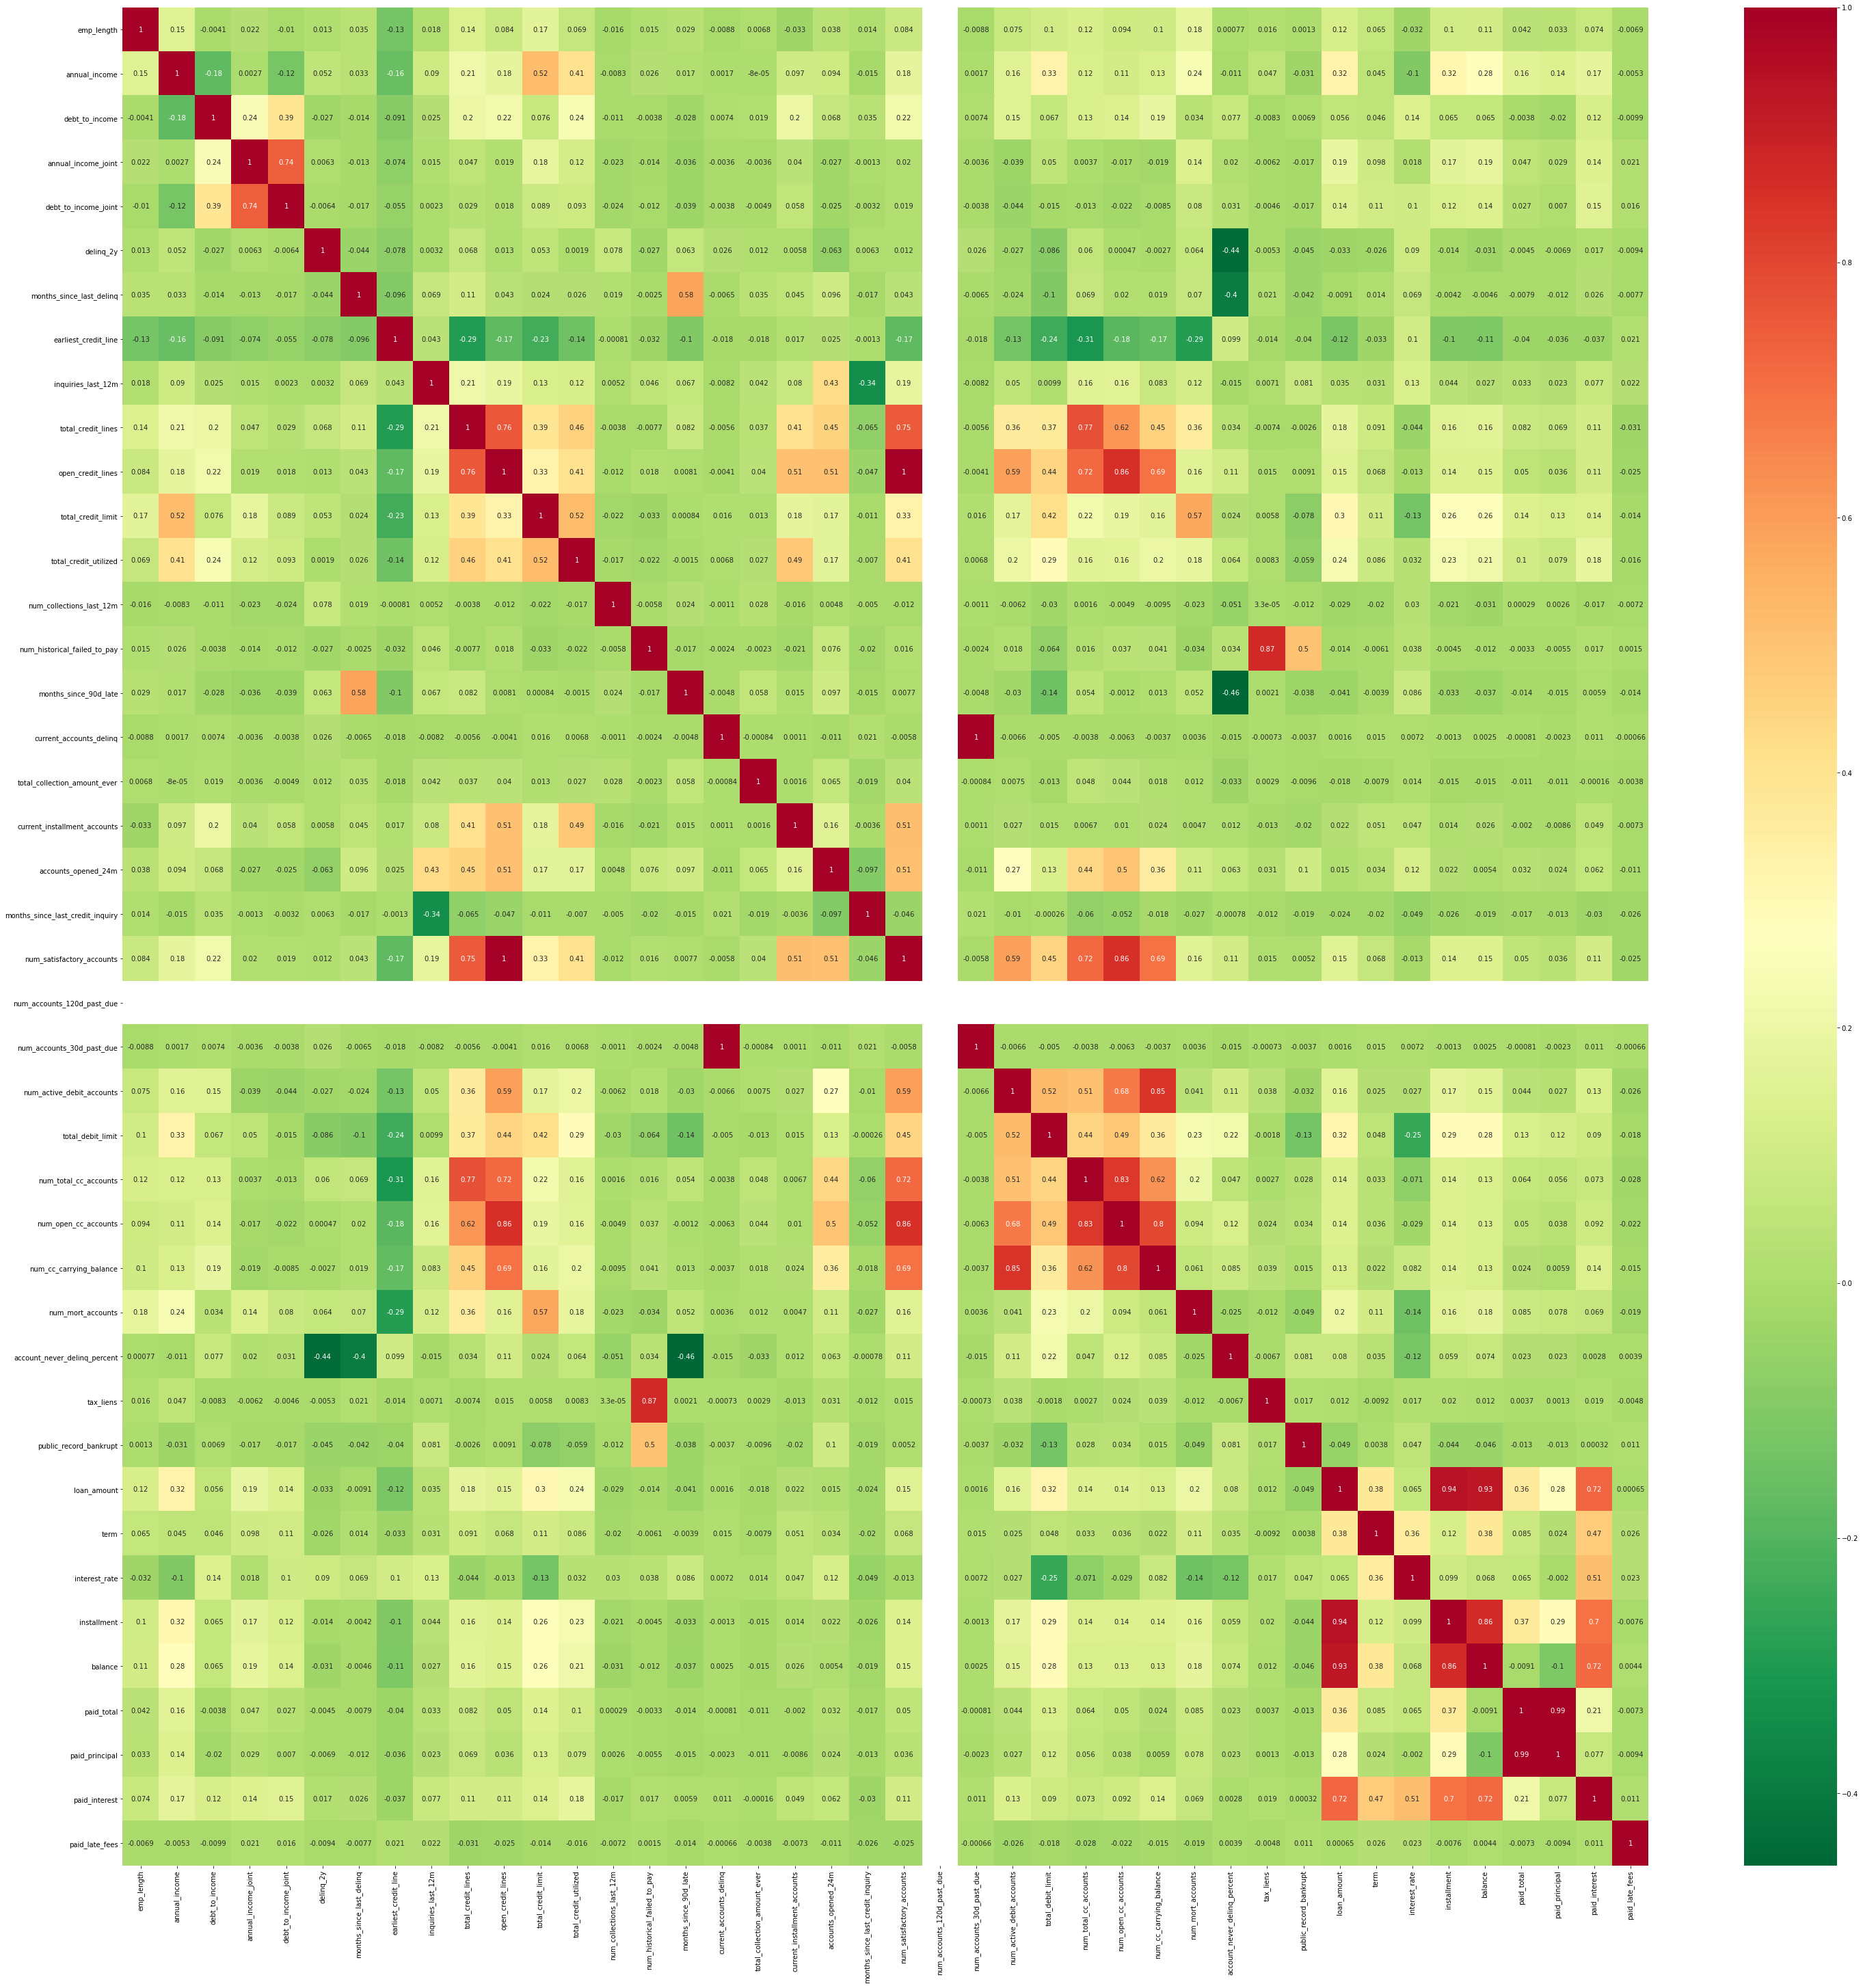

In [6]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

# Plot - 2 : Loan exposure by state
This chart illustrates loan taken state wise in the USA. Hovering over the chart will show the count of loans in that particular state.  

In [7]:
state_counts = Counter(df['state'])
state_unique = dict(state_counts).keys()
state_unique_ct = dict(state_counts).values()

fig = px.choropleth(df,  # Input Pandas DataFrame
                    locations=state_unique,  # DataFrame column with locations
                    hover_name=state_unique, # DataFrame column hover info
                    color = state_unique_ct,
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Loan exposure by State', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

# Plot - 3 : Loan Status Distribution
Status of the Loan is of 6 types. In the below pie chart, we can view each combination of types and their split percentage. As a Lending Club, we might be more interested in noting the defaulters percentage. This can be done by just selecting the two 'Late' categories from legends.

In [8]:
Loan_status_counts = Counter(df['loan_status'])
Loan_status_unique = dict(Loan_status_counts).keys()
Loan_status_unique_ct = dict(Loan_status_counts).values()

fig = px.pie(df, values=Loan_status_unique_ct,names=Loan_status_unique, title='Loan Status Distribution')


fig.update_traces(textposition='outside')
fig.show()

# Plot - 4 : Risk Level Analysis
The population of loan requestors are classified into 7 grades (A to G). Wherein, Grade-G is the highest risk category who will have to pay more interest and Grade-A is the lowest risk category. Amongst these 7 categories, there are 5 sub-grading categories. The depicted stack will represent each grade with it's respective sub-grades splitted based on the available dataset.

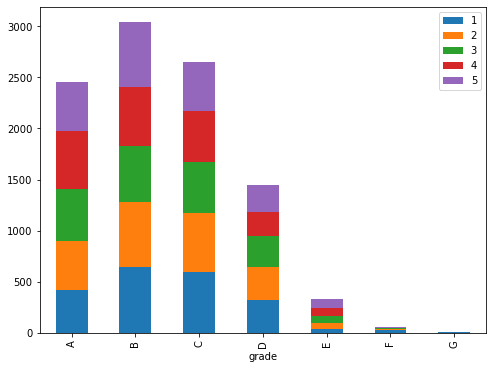

In [9]:
df['sub_grade_cat'] = df.sub_grade.apply(lambda x: x[1:])
a = pd.crosstab(df['grade'],df['sub_grade_cat']).plot(kind="bar",stacked=True,figsize=(8, 6))
a.legend(loc='upper right')

# Plot - 5 : Payment Failure-Interest Rate Analysis
Dataset is split into No-Risk, Low, Medium and High risk categories based on the column "num_historical_failed_to_pay". The population of loan requestors are being classified as 'Low' risk when the number of times they haved failed to re-pay the loan is less in the past.

In the portrayed chart, we can view that interest rate is strictly within a lower range for No-Risk population. Whereas, the rate of interest varies more for the other three Risk categories.

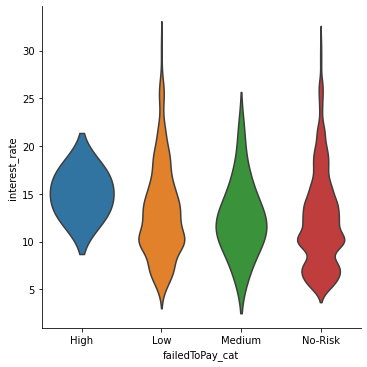

In [10]:
conditions = [
    (df['num_historical_failed_to_pay'] == 0),
    (df['num_historical_failed_to_pay'] >= 1) & (df['num_historical_failed_to_pay'] <= 3),
    (df['num_historical_failed_to_pay'] >= 4) & (df['num_historical_failed_to_pay'] <= 6),
    (df['num_historical_failed_to_pay'] >= 7)
    ]

deliq_cat = ['No-Risk', 'Low', 'Medium', 'High']

df['failedToPay_cat'] = np.select(conditions, deliq_cat)
sns.catplot(x="failedToPay_cat",y="interest_rate", kind="violin", inner=None, data=df.sort_values(by=['failedToPay_cat']))

In [11]:
#Drop the columns created from visualization
df.drop(["sub_grade_cat","failedToPay_cat"],axis=1,inplace=True)

# Model - 1 : LinearRegression
Response variable to be measured is interest rate (Continuos variable). We can use a Linear Regression model to measure a continuos variable. 


In our dataset, there are a few categorical variables to be dealt with when building a Linear Regression model. We can use two methods to cleanse our dataset, 

    (1) Factorizing the categorical varibale

    (2) One-hot encoding method

The accuracy of the model increases to 99.97% from 74.19% on using On-hot encoding method.

In [12]:
model_df = pd.DataFrame()
for i in range(len(df.columns)):
    if(df.dtypes[i]=="object"):
        col_name = df.columns[i]+"_code"
        model_df[col_name] = pd.factorize(df[df.columns[i]])[0]
    else:
        model_df[df.columns[i]] = df[df.columns[i]].fillna(0)

lin_y_fact = pd.DataFrame(model_df["interest_rate"])
lin_x_fact = model_df.loc[:, model_df. columns != "interest_rate"]

X_train, X_test, y_train, y_test = train_test_split(lin_x_fact,lin_y_fact, test_size=0.1, random_state=42)

lin_model_fact = LinearRegression().fit(X_train, y_train)
r2_score_fact = lin_model_fact.score(X_test,y_test)
print("Model Score when using factorize method is",r2_score_fact*100,'%')

Model Score when using factorize method is 74.1952665370125 %


In [13]:
#MODEL - 1 : Linear Regression
#One-hot encoding
features = pd.get_dummies(df)

lin_y_OneHot = pd.DataFrame(features["interest_rate"])
lin_x_OneHot = features.loc[:, features. columns != "interest_rate"]

X_train, X_test, y_train, y_test = train_test_split(lin_x_OneHot,lin_y_OneHot, test_size=0.2, random_state=42)
lin_model_OneHot = LinearRegression().fit(X_train, y_train)
r2_score__OneHot = lin_model_OneHot.score(X_test,y_test)
print("Model Score when using One-hot encoding method is",r2_score__OneHot*100,'%')

Model Score when using One-hot encoding method is 99.9739423304772 %


In [14]:
print('\033[1m' + '\nResult Visualisation: ' + '\033[0m')
print("The predictions of the test and train dataset allign to form a linear line to show the goodness of the model.")


Result Visualisation: 
The predictions of the test and train dataset allign to form a linear line to show the goodness of the model.


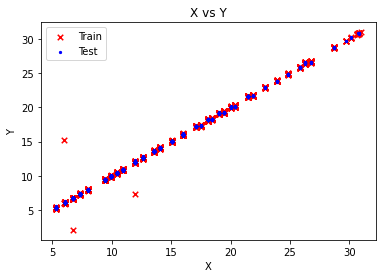

In [15]:
#Lin_model Viz:
plt.scatter(y_train, lin_model_OneHot.predict(X_train), color = "red",marker='x',s=30)
plt.scatter(y_test, lin_model_OneHot.predict(X_test), color = "blue",marker='o',s=5)
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["Train", "Test"], loc ="upper left")
plt.show()

# MODEL - 2 : RandomForestRegressor
As One-hot encoding is a bteer approach. We continue to use the same train and test dataset for our second model. The predictions of the test and train dataset allign to form a Linear line to show the goodness of the model.

In [16]:
# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
print("RandomForest model score on using One-hot encoding method is",rf.score(X_test,y_test)*100,'%')

<ipython-input-16-eb710604c51d>:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForest model score on using One-hot encoding method is 99.99284801321079 %


# Result Visualisation: 
The results of the RandomForest model is as below:

[Text(581.1194458007812, 533.5333333333333, 'X[4857] <= 0.5\nmse = 24.563\nsamples = 5057\nvalue = 12.42'),
 Text(392.3369384765625, 513.4, 'X[4858] <= 0.5\nmse = 18.581\nsamples = 3838\nvalue = 14.227'),
 Text(244.31118164062502, 493.2666666666667, 'X[4859] <= 0.5\nmse = 14.839\nsamples = 2293\nvalue = 16.768'),
 Text(123.95156250000001, 473.1333333333333, 'X[4860] <= 0.5\nmse = 10.217\nsamples = 930\nvalue = 20.572'),
 Text(45.91875, 453.0, 'X[4861] <= 0.5\nmse = 3.921\nsamples = 200\nvalue = 25.863'),
 Text(16.275000000000002, 432.8666666666667, 'X[4889] <= 0.5\nmse = 0.854\nsamples = 31\nvalue = 29.741'),
 Text(13.950000000000001, 412.73333333333335, 'X[4890] <= 0.5\nmse = 0.16\nsamples = 19\nvalue = 30.487'),
 Text(11.625, 392.6, 'X[4891] <= 0.5\nmse = 0.053\nsamples = 16\nvalue = 30.631'),
 Text(6.9750000000000005, 372.4666666666667, 'X[4892] <= 0.5\nmse = 0.007\nsamples = 12\nvalue = 30.734'),
 Text(4.65, 352.33333333333337, 'X[4900] <= 0.5\nmse = 0.002\nsamples = 7\nvalue = 30.

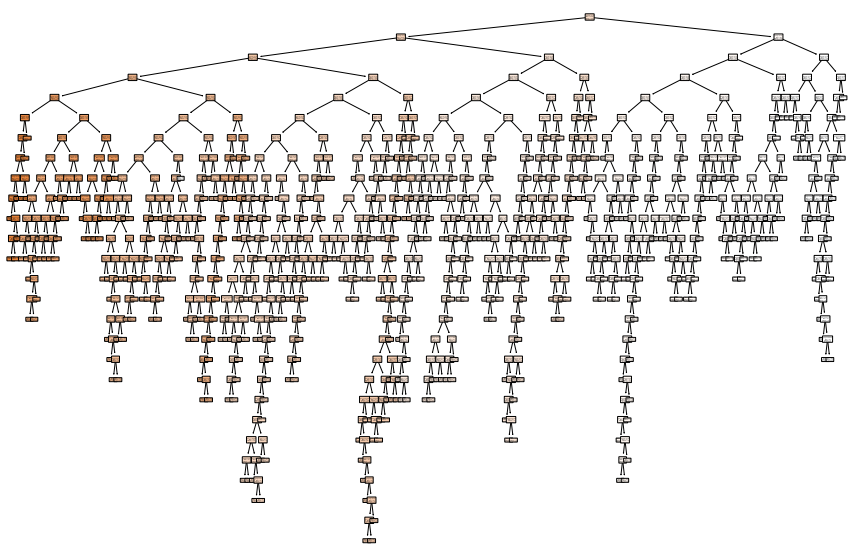

In [17]:
#Random forest Viz:
fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          #feature_names=X_test.feature_names,
          #class_names=y_test.target_names, 
          filled=True, impurity=True, 
          rounded=True)

# 
Given more time, I would have been able to analyse the data more deeper, and build better models and experiment different approaches. Also, I can improve the co-efficients and used boosting methods. In-depth analysis of the data would help me provide more informative visualizations.